<div style="justify-content: center; align-items: center; font-family: Arial, sans-serif; background-color: #f0f0f0;">
    <h1 style="color: #333; text-align: center;">Applied Machine Learning Project Report</h1>
    <h2 style="color: #666; text-align: center;">Diseases Prediction Dataset</h2>
    <h3 style="color: #999; text-align: center;"><em>Tom Bourjala, Wiktoria Ciasnocha, Patricia List, Adela Ondrouchova</em></h3>
</div>


# Table of Contents

1. [Loading the Data](#Loading-the-Data)
2. [Data Analysis Before Normalization](#Data-Analysis-Before-Normalization)
    - [Shape and Types](#Shape-and-Types)
    - [Features and Classes](#Features-and-Classes)
        - [Classes (Diseases)](#Classes-(Diseases))
        - [Features (Symptoms)](#Features-(Symptoms))
        - [Number of Symptoms Per Entry](#Number-of-Symptoms-Per-Entry)
    - [Duplicates Analysis](#Duplicates-Analysis)
3. [One Hot Encoding](#One-Hot-Encoding)
    - [Conversion](#Conversion)
        - [From `Symptom_1` to `Symptom_17` to `Symptoms`](#From-Symptom_1-to-Symptom_17-to-Symptoms)
        - [From `Symptoms` to `Symptoms_one_hot`](#From-Symptoms-to-Symptoms_one_hot)
        - [From `Disease` to `Disease_one_hot`](#From-Disease-to-Disease_one_hot)
    - [Merging](#Merging)
4. [Feature Based Sampling](#Feature-Based-Sampling)
    - [Duplicates Analysis Before Sampling](#Duplicates-Analysis-Before-Sampling)
    - [Sampling](#Sampling)
5. [Data Analysis After Sampling](#Data-Analysis-After-Sampling)
6. [Models](#Models)
    - [Train and Test Split](#Train-and-Test-Split)
    - [Custom Grid Search](#Custom-Grid-Search)
        - [Logistic Regression](#Logistic-Regression)
        - [KNN](#KNN)
        - [Decision Tree](#Decision-Tree)
        - [Random Forest](#Random-Forest)
        - [Neural Network](#Neural-Network)
7. [Prediction](#Prediction)
    - [Random Forest with Prediction Details](#Random-Forest-with-Prediction-Details)
    - [Neural Network with Prediction Details](#Neural-Network-with-Prediction-Details)


# Loading the data

This section loads the dataset from a CSV file using the pandas library and stores it in a DataFrame called `df`. It also imports necessary libraries and sets up inline plotting.

In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
%matplotlib inline

df = read_csv('resources/dataset.csv')

# Data Analysis before normalization

In [3]:
from matplotlib import pyplot as plt

## Shape and types
This section displays information about the dataset, including the data types of columns and the shape of the DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
df.shape

(4920, 18)

In [6]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


## Features and Classes
This section extracts the unique diseases and symptoms from the dataset and provides a count of diseases and a list of symptoms.

In [8]:
# All diseases entries
diseasesEntries = df['Disease']

# List of all diseases
diseases = diseasesEntries.unique()

#trim the diseases
diseases = [disease.strip() for disease in diseases]

# All symptoms entries
symptomsEntries = df[df.columns.difference(['Disease'])].stack()

# List of all symptoms
symptoms = symptomsEntries.unique()

#trim the symptoms
symptoms = [symptom.strip() for symptom in symptoms]


### Classes (Diseases)
This section displays the count of entries for each disease, indicating the distribution of diseases in the dataset.

In [9]:
df.groupby('Disease').size()

Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [10]:
len(diseases)

41

### Features (Symptoms)
This section displays a list of symptoms present in the dataset and provides the count of unique symptoms.

In [11]:
pd.DataFrame(symptoms)

,0
0,itching
1,skin_rash
2,nodal_skin_eruptions
3,dischromic _patches
4,continuous_sneezing
...,...
126,small_dents_in_nails
127,inflammatory_nails
128,blister
129,red_sore_around_nose


In [12]:
len(symptoms)

131

#### Number of symptoms per entry
This section analyzes the distribution of the number of symptoms per entry and visualizes it using a density plot.

<AxesSubplot:ylabel='Density'>

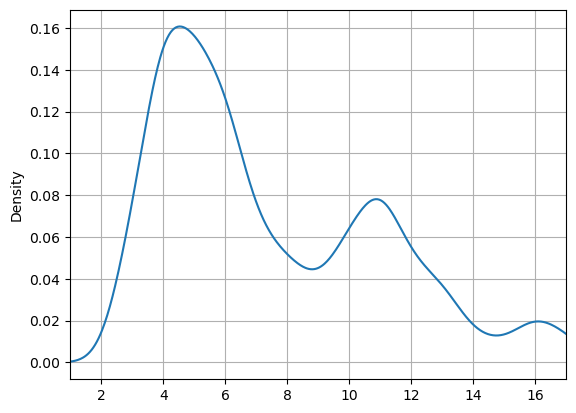

In [13]:
number_of_symptoms_per_entry = df.iloc[:, 1:].count(axis=1)
number_of_symptoms_per_entry.plot(kind='density', xlim=(1, 17), xlabel='Symptoms', grid='on')

## Duplicates analysis
This section examines duplicates in the dataset, including the shape of the dataset before and after removing duplicates, as well as the count of entries per disease with and without duplicates.

In [14]:
df.shape

(4920, 18)

In [15]:
df_without_duplicates = df.drop_duplicates()
df_without_duplicates.shape

(304, 18)

<AxesSubplot:>

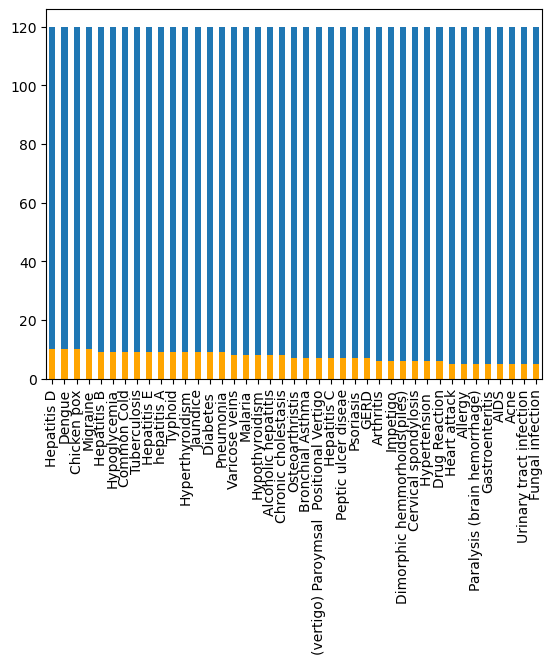

In [16]:
number_of_entries_per_disease = df['Disease'].value_counts()
number_of_entries_per_disease_without_duplicates = df_without_duplicates['Disease'].value_counts()

number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# One hot encoding

## Conversion
This section converts the original DataFrame format, where symptoms are represented by separate columns ('Symptom_1' to 'Symptom_17'), into a new format where symptoms are aggregated into a single column ('Symptoms') for each entry, along with the corresponding disease. The conversion involves removing null values and trimming whitespace from disease and symptom names.

### From `Symptom_1` to `Symptom_17` to `Symptoms`
This section performs one-hot encoding on the 'Symptoms' column in the converted DataFrame. It creates a binary representation of symptoms, where each symptom is represented by a separate column, and the presence or absence of a symptom is indicated by 1 or 0, respectively.




Convert from
```json
{
    "Disease": ["String"],
    "Symptom_1": ["String"],
    "...":["String"],
    "Symptom_17": ["String"]
} 
```
to
```json
{
    "Disease": ["String"], 
    "Symptoms": [["String"]]
}
```

In [17]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

symptom_cols = [col for col in df if col.startswith('Symptom_')]
df_converted = df.apply(lambda row: [symptoms for symptoms in row[symptom_cols] if pd.notnull(symptoms)], axis=1).to_frame(name='Symptoms')
df_converted['Disease'] = diseasesEntries
df_converted = df_converted[['Disease', 'Symptoms']]

#fix disease and symptoms names
df_converted['Disease'] = df_converted['Disease'].apply(lambda x: x.strip())
df_converted['Symptoms'] = df_converted['Symptoms'].apply(lambda x: [symptom.strip() for symptom in x])

df_converted.head()


,Disease,Symptoms
0,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions, dis..."
1,Fungal infection,"[skin_rash, nodal_skin_eruptions, dischromic _..."
2,Fungal infection,"[itching, nodal_skin_eruptions, dischromic _pa..."
3,Fungal infection,"[itching, skin_rash, dischromic _patches]"
4,Fungal infection,"[itching, skin_rash, nodal_skin_eruptions]"


### From `Symptoms` to `Symptoms_one_hot`
This section performs one-hot encoding on the 'Symptoms' column in the converted DataFrame. It creates a binary representation of symptoms, where each symptom is represented by a separate column, and the presence or absence of a symptom is indicated by 1 or 0, respectively.

In [19]:
Symptoms_one_hot = pd.get_dummies(df_converted['Symptoms'].apply(pd.Series).stack()).groupby(level=0).sum()
Symptoms_one_hot.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### From `Diease` to `Disease_one_hot`
This section performs one-hot encoding on the 'Disease' column in the converted DataFrame. It creates a binary representation of diseases, where each disease is represented by a separate column, and the presence or absence of a disease is indicated by 1 or 0, respectively.

In [20]:
Disease_one_hot = pd.get_dummies(df_converted['Disease'])
Disease_one_hot.head()

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Merging
This section combines the one-hot encoded 'Symptoms' and 'Disease' columns into a single DataFrame by merging them together.

In [21]:
df_one_hot = pd.concat([Symptoms_one_hot, Disease_one_hot], axis=1)

symptoms_cols_range = range(0, len(symptoms))
diseases_cols_range = range(len(symptoms), len(symptoms) + len(diseases))

df_one_hot.columns

Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort',
       ...
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A'],
      dtype='object', length=172)

# Feature based sampling

In [22]:
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

## Duplicates analysis before sampling
This section analyzes the shape of the original one-hot encoded DataFrame and the 'df_one_hot_without_duplicates' DataFrame to compare the number of entries per disease before and after removing duplicates. It also visualizes the distribution using bar plots.

In [23]:
df_one_hot.shape

(4920, 172)

In [24]:
df_one_hot_without_duplicates.shape

(304, 172)

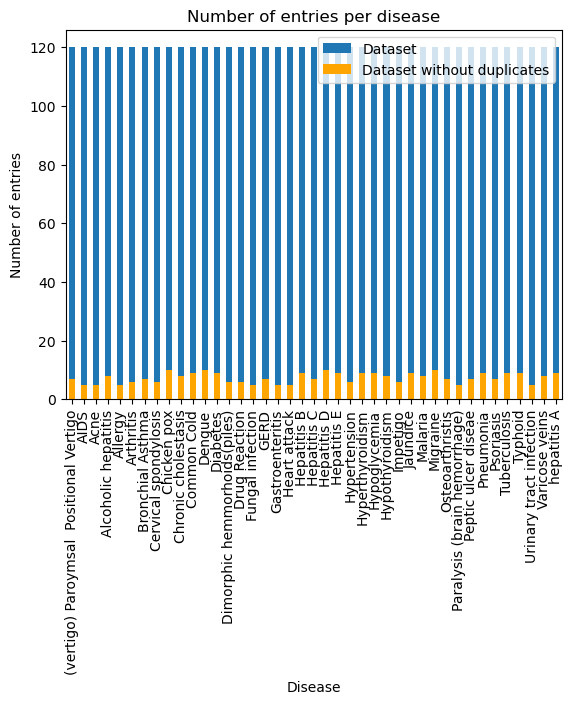

In [25]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after removing duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Dataset', 'Dataset without duplicates'])

## Sampling
This section performs feature-based sampling on the 'df_one_hot_without_duplicates' DataFrame. It splits identical subsets based on diseases, shuffles them, and divides them into train, test, and test CV subsets. The subsets are then concatenated to create the sampled DataFrame 'df_one_hot_sampled'.


In [26]:
df_on_hot_train = pd.DataFrame(columns=df_one_hot.columns, dtype=np.uint8)
df_on_hot_test = pd.DataFrame(columns=df_one_hot.columns, dtype=np.uint8)
df_on_hot_test_cv = pd.DataFrame(columns=df_one_hot.columns, dtype=np.uint8)

# Split in identical subsets
identical_subsets = pd.DataFrame({'subset': []})
df_one_hot_without_duplicates = df_one_hot.drop_duplicates()

for subset_model in df_one_hot_without_duplicates.values :
    subset = pd.DataFrame(columns=df_one_hot.columns)
    for element in df_one_hot.values :
        if np.array_equal(subset_model, element) :
            subset.loc[len(subset)] = element
    identical_subsets.loc[len(identical_subsets)] = [subset]

print('{} subsets identified'.format(len(identical_subsets)))
print('Subsets contain {:.2f} elements on average'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))

# divide by a number of elements in each subset
for index, row in identical_subsets.iterrows() :
    subset = row['subset']
    subset_len = len(subset)
    subset_len_aim = int(subset_len / 5)
    if subset_len_aim == 0 :
        subset_len_aim = 1
    subset = subset.iloc[0:subset_len_aim]
    identical_subsets.loc[index] = [subset]

print('Subsets contain {:.2f} elements on average after sampling'.format(identical_subsets['subset'].apply(lambda x: len(x)).mean()))
print('{} subsets are empty'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 0])))
print('{} subsets contain only one element'.format(len(identical_subsets[identical_subsets['subset'].apply(lambda x: len(x)) == 1])))

split_ratio = 0.5

# Split subsets in train and test based on disease, so for 10 subsets we have 8 subsets in train and 2 in test
for disease in diseases :
    disease_subsets = identical_subsets[identical_subsets['subset'].apply(lambda x: x[disease].values[0] == 1)]

    # Shuffle subsets
    np.random.seed(42)
    disease_subsets = disease_subsets.sample(frac=1)
    train_subsets_index = int(len(disease_subsets) * split_ratio)
    test_subsets_index = int(len(disease_subsets) * (1 - split_ratio) / 2)

    train_subsets = disease_subsets.iloc[0:train_subsets_index]
    test_subsets = disease_subsets.iloc[train_subsets_index:train_subsets_index + test_subsets_index]
    test_cv_subsets = disease_subsets.iloc[train_subsets_index + test_subsets_index:]
    df_on_hot_train = pd.concat([df_on_hot_train, pd.concat([row['subset'] for index, row in train_subsets.iterrows()])])
    df_on_hot_test = pd.concat([df_on_hot_test, pd.concat([row['subset'] for index, row in test_subsets.iterrows()])])
    df_on_hot_test_cv = pd.concat([df_on_hot_test_cv, pd.concat([row['subset'] for index, row in test_cv_subsets.iterrows()])])

# Concatenate all subsets
df_one_hot_sampled = pd.concat([df_on_hot_train, df_on_hot_test, df_on_hot_test_cv])

print('Train dataset contains {} elements'.format(len(df_on_hot_train)))
print('Test dataset contains {} elements'.format(len(df_on_hot_test)))
print('Train dataset contains {:.2f} elements per disease on average'.format(df_on_hot_train.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0).mean()))
print('Test dataset contains {:.2f} elements per disease on average'.format(df_on_hot_test.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0).mean()))
print('Test CV dataset contains {:.2f} elements per disease on average'.format(df_on_hot_test_cv.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0).mean()))

304 subsets identified
Subsets contain 16.18 elements on average
Subsets contain 2.97 elements on average after sampling
0 subsets are empty
216 subsets contain only one element
Train dataset contains 576 elements
Test dataset contains 75 elements
Train dataset contains 14.05 elements per disease on average
Test dataset contains 1.83 elements per disease on average
Test CV dataset contains 6.17 elements per disease on average


## Data Analysis after sampling
This section analyzes the shape of the 'df_one_hot_sampled' DataFrame and the 'df_one_hot_sampled_without_duplicates' DataFrame to compare the number of entries per disease before and after sampling. It also visualizes the distribution using bar plots. Additionally, it generates a heatmap of the correlation between symptoms in the sampled DataFrame.

In [27]:
df_one_hot_sampled.shape

(904, 172)

In [28]:
df_one_hot_sampled_without_duplicates = df_one_hot_sampled.drop_duplicates()
df_one_hot_sampled_without_duplicates.shape

(304, 172)

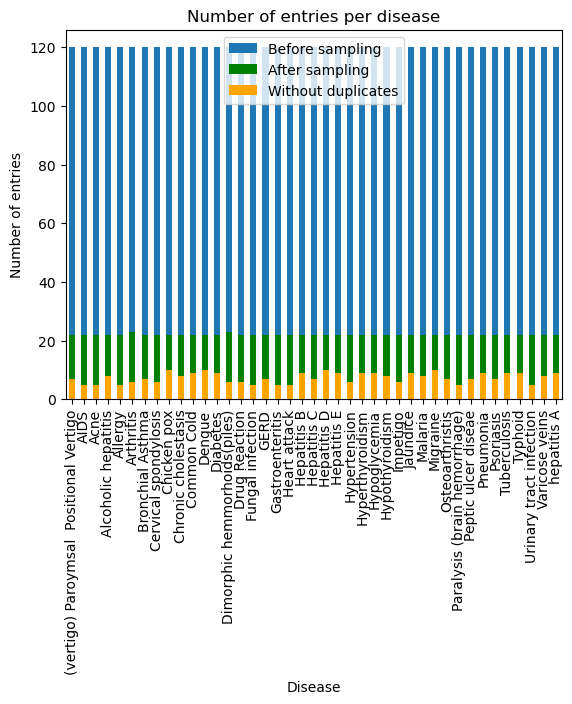

In [29]:
number_of_entries_per_disease = df_one_hot.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_sampled = df_one_hot_sampled.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)
number_of_entries_per_disease_without_duplicates = df_one_hot_without_duplicates.iloc[:, len(symptoms):len(symptoms) + len(diseases)].sum(axis=0)

# plot the number of entries per disease before and after sampling, and without duplicates
number_of_entries_per_disease.plot.bar()
number_of_entries_per_disease_sampled.plot.bar(color='green')
number_of_entries_per_disease_without_duplicates.plot.bar(color='orange')

# add labels
plt.xlabel('Disease')
plt.ylabel('Number of entries')
plt.title('Number of entries per disease')
plt.legend(['Before sampling', 'After sampling', 'Without duplicates'])


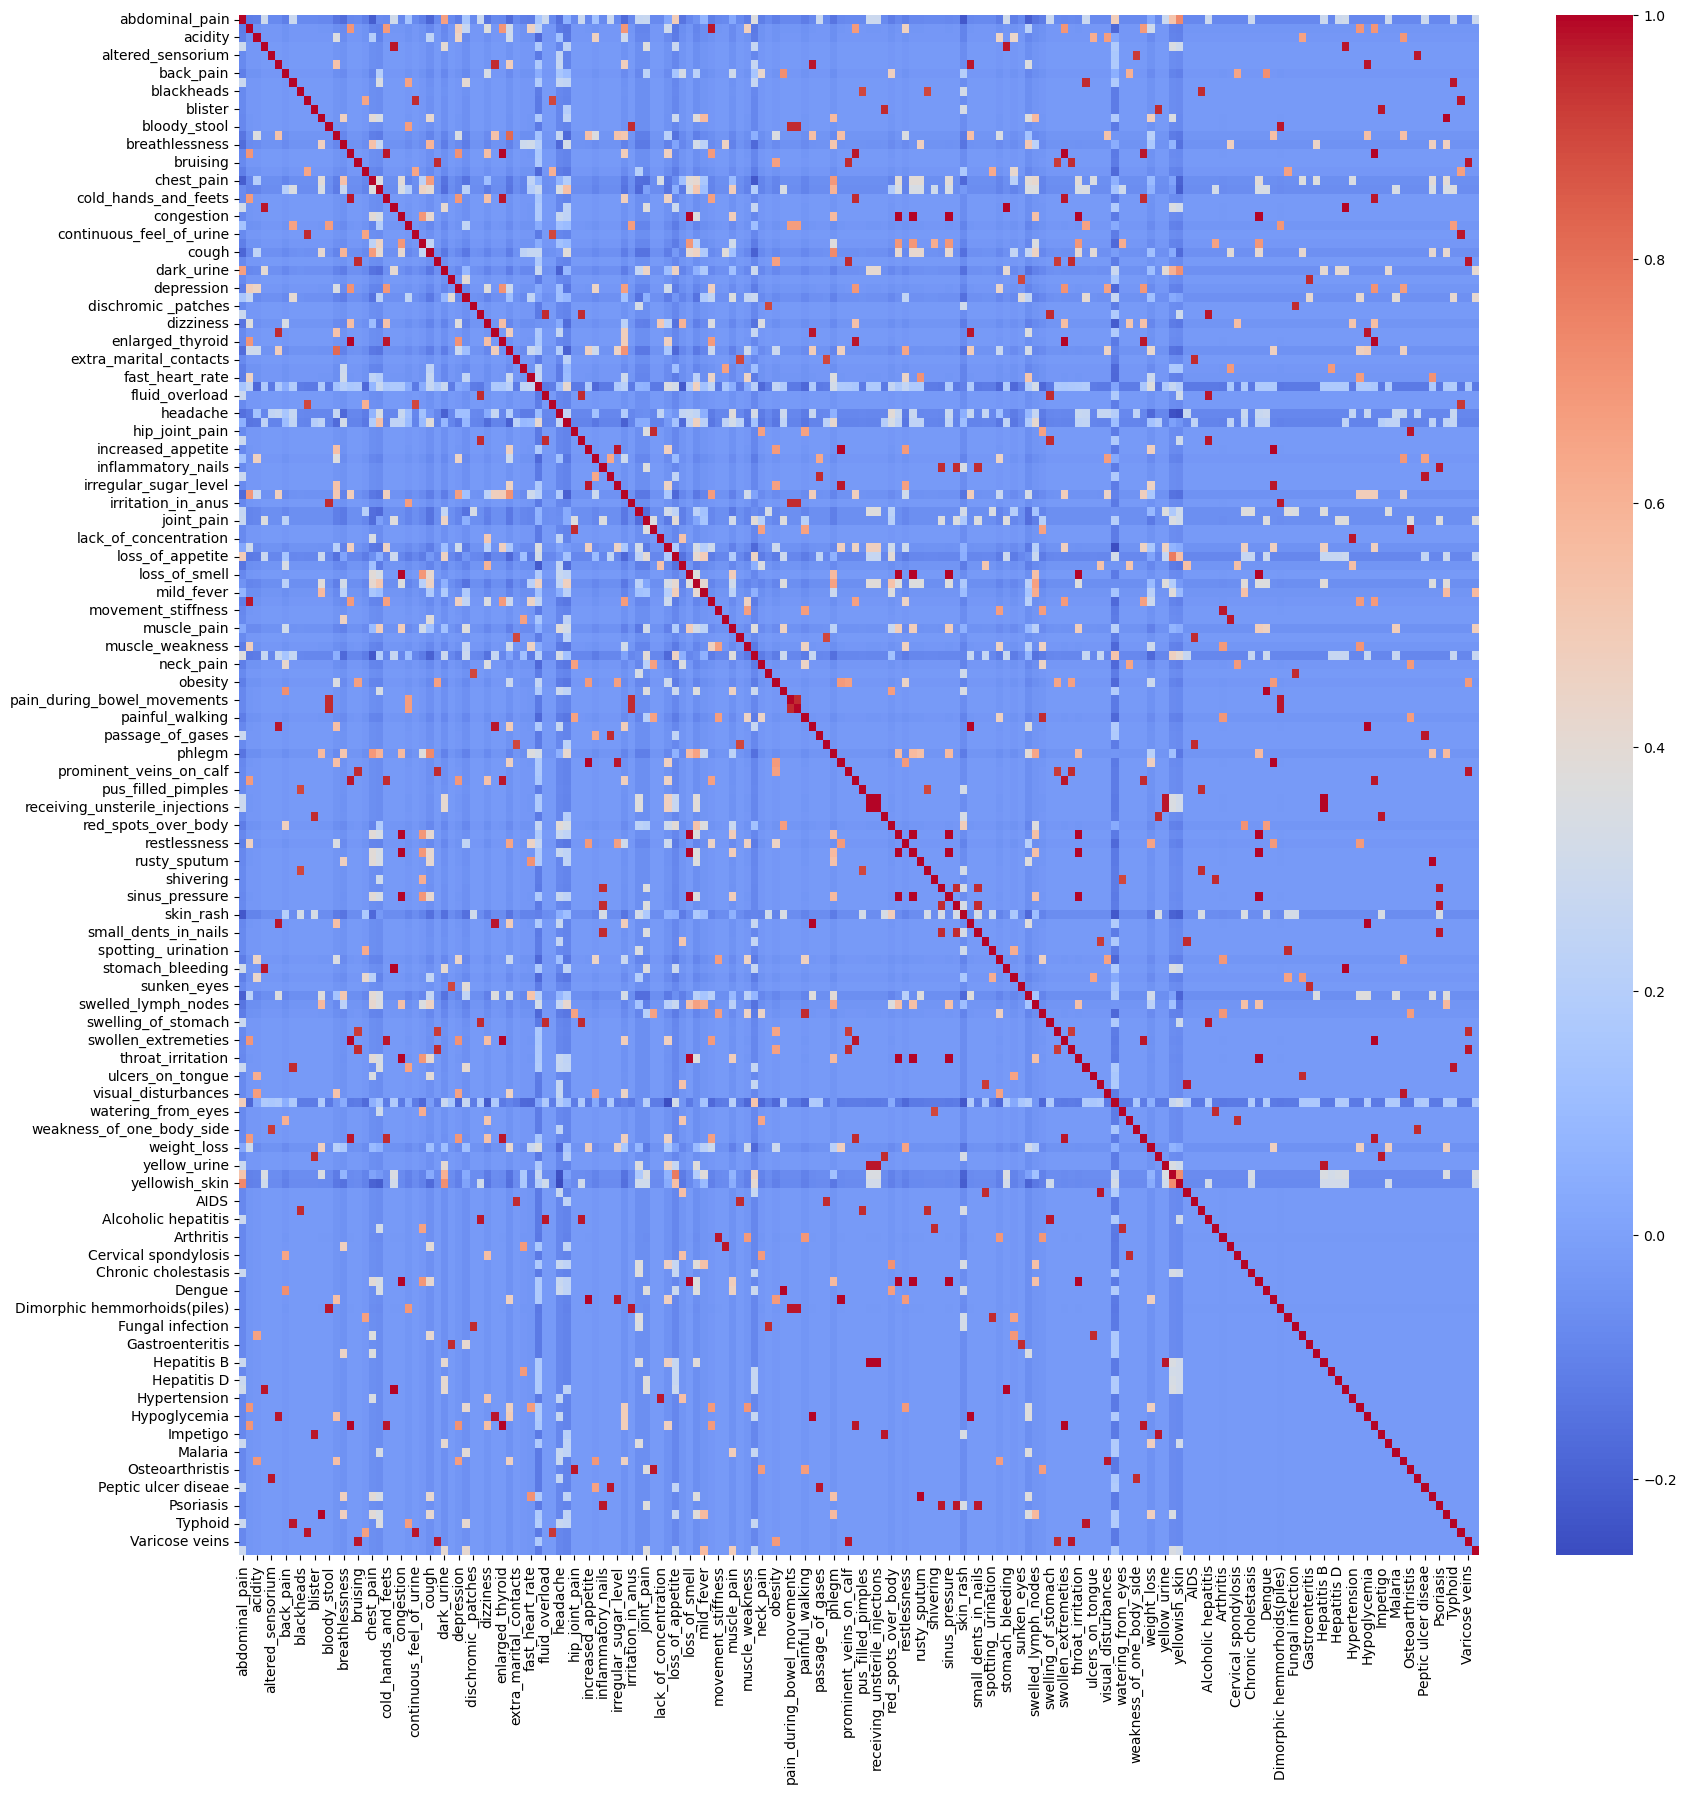

In [30]:
# Heatmap of correlation between symptoms
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df_one_hot_sampled.iloc[:, 0:len(symptoms) + len(diseases)].corr(), annot=False, fmt='.2f', cmap='coolwarm')
plt.show()

# Models

## Train and test split
This section splits the one-hot encoded train and test datasets into features (X) and labels (y) for both train and test sets. It also extracts the labels in their original form (disease names) for evaluation purposes.

In [31]:
X_train = df_on_hot_train.iloc[:, 0:len(symptoms)]
y_train = df_on_hot_train.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

X_test = df_on_hot_test.iloc[:, 0:len(symptoms)]
y_test = df_on_hot_test.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

X_test_cv = df_on_hot_test_cv.iloc[:, 0:len(symptoms)]
y_test_cv = df_on_hot_test_cv.iloc[:, len(symptoms):len(symptoms) + len(diseases)]

y_train_labels = y_train.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)
y_test_cv_labels = y_test_cv.idxmax(axis=1)

## Custom Grid Search
This section defines a custom grid search class 'CustomGridSearch' that performs grid search over hyperparameters for an estimator. It stores the results and mean test scores for each parameter combination.

In [32]:
from sklearn.model_selection import ParameterGrid
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class CustomGridSearch:
    def __init__(self, estimator, param_grid):
        self.estimator = estimator
        self.param_grid = param_grid
        self.results_ = []
        self.mean_test_scores_ = []  # Add a new list to store mean test scores

    def fit(self, X_train, y_train, X_test, y_test):
        best_score = 0
        best_params = None
        for params in ParameterGrid(self.param_grid):
            model = clone(self.estimator).set_params(**params)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            result = {**params, 'test_score': score}
            self.results_.append(result)
            self.mean_test_scores_.append(score)  # Store the mean test score
            if score > best_score:
                best_score = score
                best_params = params

        self.best_score_ = best_score
        self.best_params_ = best_params
        self.best_estimator_ = clone(self.estimator).set_params(**best_params)
        self.best_estimator_.fit(X_train, y_train)

    def score(self, X, y):
        return self.best_estimator_.score(X, y)

## Logistic Regression
This section trains a logistic regression model using the 'LogisticRegression' class from scikit-learn. It prints the accuracy score and classification report for the model's predictions on the test set.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train_labels)

y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test_labels))
print(accuracy_score(y_test_labels, y_pred))

from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True)).transpose()
classification_report_df


1.0
1.0


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,1.0
AIDS,1.0,1.0,1.0,2.0
Acne,1.0,1.0,1.0,2.0
Alcoholic hepatitis,1.0,1.0,1.0,2.0
Allergy,1.0,1.0,1.0,2.0
Arthritis,1.0,1.0,1.0,1.0
Bronchial Asthma,1.0,1.0,1.0,2.0
Cervical spondylosis,1.0,1.0,1.0,2.0
Chicken pox,1.0,1.0,1.0,2.0
Chronic cholestasis,1.0,1.0,1.0,2.0


## KNN
This section performs model complexity analysis by varying the number of neighbors for KNN and plots the training and test scores. It then performs grid search using 'CustomGridSearch' to find the best number of neighbors based on the mean cross-validation score. It prints the best score, best parameters, and test-set score. Finally, it trains a KNN model using the best parameters and prints the accuracy score.

C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

best mean cross-validation score: 1.000
best parameters: {'n_neighbors': 1}
test-set score: 1.000
accuracy: 1.00


C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Tom Bourjala\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

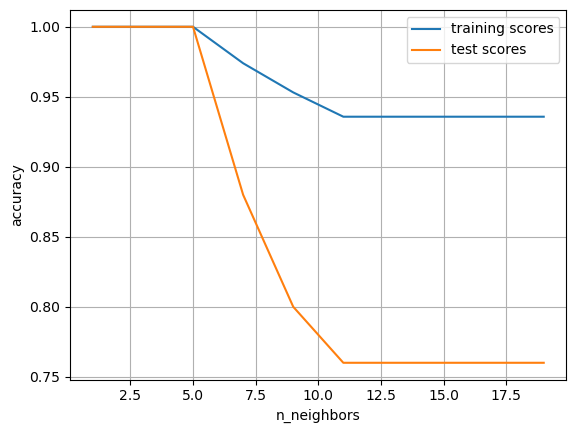

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#Model complexity
neighbors = range(1, 20, 2)

training_scores = []
test_scores = []

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid()

# GridSearch
param_grid_knn = {'n_neighbors': np.arange(1, 20, 2)}

grid = CustomGridSearch(KNeighborsClassifier(), param_grid_knn)
grid.fit(X_train, y_train, X_test_cv, y_test_cv)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


# KNN with the best parameters
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)


## Decision Tree
This section trains a decision tree classifier using the 'DecisionTreeClassifier' class from scikit-learn. It prints the accuracy score and classification report for the model's predictions on the test set. It then performs grid search using 'CustomGridSearch' to find the best value for the 'max_depth' hyperparameter, plots the test scores, and prints the best score and best parameters. Another grid search is performed to find the best value for the 'max_features' hyperparameter, and its test-set score is printed. Finally, a decision tree is trained using the best parameters and its accuracy score is printed.


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df


accuracy: 0.69


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,0.000000,0.000000,0.000000,1.000000
AIDS,0.000000,0.000000,0.000000,2.000000
Acne,1.000000,1.000000,1.000000,2.000000
Alcoholic hepatitis,0.250000,1.000000,0.400000,2.000000
Allergy,1.000000,1.000000,1.000000,2.000000
Arthritis,1.000000,1.000000,1.000000,1.000000
Bronchial Asthma,0.500000,1.000000,0.666667,2.000000
Cervical spondylosis,0.153846,1.000000,0.266667,2.000000
Chicken pox,1.000000,1.000000,1.000000,2.000000
Chronic cholestasis,0.500000,0.500000,0.500000,2.000000


best score: 0.893
best parameters: {'max_depth': 31}
test-set score: 0.840


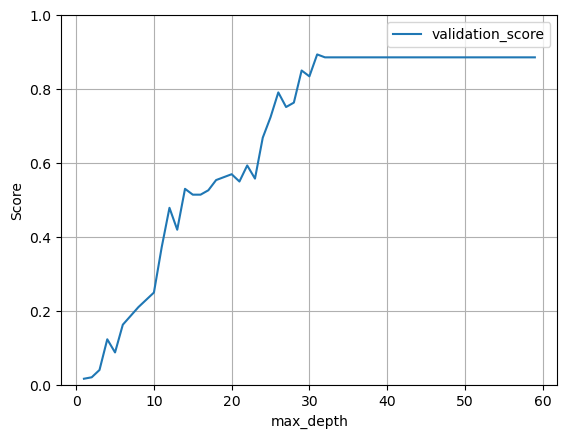

In [36]:
param_grid = {'max_depth': range(1, 60, 1)}

grid = CustomGridSearch(DecisionTreeClassifier(random_state=42, max_features=3), param_grid)
grid.fit(X_train, y_train_labels, X_test_cv, y_test_cv_labels)

scores = pd.DataFrame(grid.results_)

#rename test_score to validation_score
scores.rename(columns={'test_score': 'validation_score'}, inplace=True)

scores.plot(x='max_depth', y='validation_score', ylim=(0, 1),ylabel= 'Score', grid= 'on')

print("best score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

best mean cross-validation score: 0.917
best parameters: {'max_depth': 31, 'max_features': 2}
test-set score: 0.760


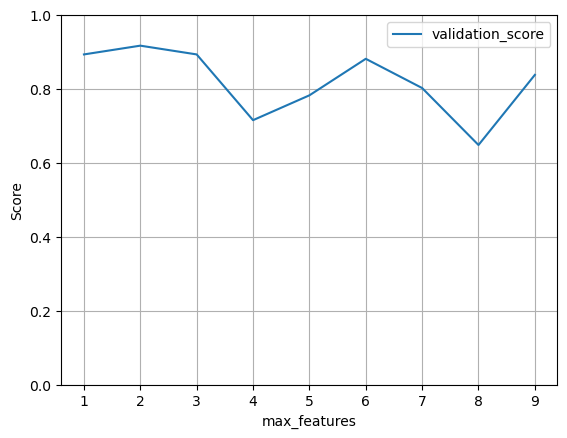

In [37]:
param_grid = {'max_features': range(1, 10, 1), 'max_depth': [grid.best_params_['max_depth']]}

grid = CustomGridSearch(DecisionTreeClassifier(random_state=42), param_grid)

grid.fit(X_train, y_train_labels, X_test_cv, y_test_cv_labels)

scores = pd.DataFrame(grid.results_)

#rename test_score to validation_score
scores.rename(columns={'test_score': 'validation_score'}, inplace=True)

scores.plot(x='max_features', y='validation_score', ylim=(0, 1),ylabel= 'Score', grid= 'on')

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test_labels)))

In [38]:
# Decision Tree with the best parameters
clf = DecisionTreeClassifier(random_state=42, max_depth=grid.best_params_['max_depth'], max_features=grid.best_params_['max_features'])
clf.fit(X_train, y_train_labels)
print("train accuracy: {:.2f}".format(clf.score(X_train, y_train_labels)))
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)
print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))

# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

train accuracy: 0.99
accuracy: 0.76


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.000000,1.000000,1.000000,1.00
AIDS,0.250000,1.000000,0.400000,2.00
Acne,1.000000,1.000000,1.000000,2.00
Alcoholic hepatitis,1.000000,1.000000,1.000000,2.00
Allergy,1.000000,1.000000,1.000000,2.00
Arthritis,0.333333,1.000000,0.500000,1.00
Bronchial Asthma,0.000000,0.000000,0.000000,2.00
Cervical spondylosis,0.000000,0.000000,0.000000,2.00
Chicken pox,0.000000,0.000000,0.000000,2.00
Chronic cholestasis,0.333333,0.500000,0.400000,2.00


## Random Forest
This section trains a random forest classifier using the 'RandomForestClassifier' class from scikit-learn. It prints the accuracy score and classification report for the model's predictions on the test set.

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
clf = RandomForestClassifier(random_state=42, max_features=1)

# Fit the decision tree to the training data
clf.fit(X_train, y_train_labels)

# Predict the disease for the test data using the trained decision tree
y_pred = clf.predict(X_test)
y_test_labels = y_test.idxmax(axis=1)

print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred)))
# Print a summary of the classification metrics
from sklearn.metrics import classification_report
classification_report_df = pd.DataFrame(classification_report(y_test_labels, y_pred, output_dict=True, zero_division=0)).transpose()
classification_report_df

accuracy: 1.00


,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,1.0
AIDS,1.0,1.0,1.0,2.0
Acne,1.0,1.0,1.0,2.0
Alcoholic hepatitis,1.0,1.0,1.0,2.0
Allergy,1.0,1.0,1.0,2.0
Arthritis,1.0,1.0,1.0,1.0
Bronchial Asthma,1.0,1.0,1.0,2.0
Cervical spondylosis,1.0,1.0,1.0,2.0
Chicken pox,1.0,1.0,1.0,2.0
Chronic cholestasis,1.0,1.0,1.0,2.0


## Neural Network
This section trains a neural network classifier using Keras and TensorFlow. It performs a grid search using 'CustomGridSearch' to find the best hyperparameters (number of neurons in each layer and dropout rate) based on the mean cross-validation score. It prints the best score and best parameters. The best model is then trained using the best parameters and its accuracy score is printed. Additionally, a heatmap of the mean test scores is plotted to visualize the grid search results.

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import set_random_seed
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(42)
tf.random.set_seed(42)

X_train_n = X_train.to_numpy()
y_train_labels_n = y_train_labels.to_numpy()
X_test_n = X_test.to_numpy()
y_test_labels_n = y_test_labels.to_numpy()
X_test_cv_n = X_test_cv.to_numpy()
y_test_cv_labels_n = y_test_cv_labels.to_numpy()

input_dim = X_train.shape[1]
output_dim = len(diseases)
set_random_seed(42)

# Function to create the Keras model
def create_model(neurons_1, neurons_2, dropout_rate):
    model = Sequential([
        Dense(input_dim, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons_1, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons_2, activation='relu'),
        Dropout(dropout_rate),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=3)
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

# Define the hyperparameter grid
param_grid = {
    'neurons_1': [16, 32, 64],
    'neurons_2': [8, 16, 32],
    'dropout_rate': [0.1, 0.2, 0.3]
}

# Create the grid search object
grid = CustomGridSearch(model, param_grid)

# Perform the grid search
grid.fit(X_train, y_train_labels, X_test_cv, y_test_cv_labels)

# Print the results of the best hyperparameters
print("Best score: %f using %s" % (grid.best_score_, grid.best_params_))

# train and save best model
nn_best_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping], **grid.best_params_)
nn_best_model.fit(X_train, y_train_labels)
y_pred_n = nn_best_model.predict(X_test)
print("accuracy: {:.2f}".format(accuracy_score(y_test_labels, y_pred_n)))

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_14716\2879433388.py:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])


Best score: 1.000000 using {'dropout_rate': 0.1, 'neurons_1': 32, 'neurons_2': 16}


C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_14716\2879433388.py:60: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_best_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping], **grid.best_params_)


3/3 [==============================] - 0s 1ms/step
accuracy: 1.00


In [53]:
from keras.utils import plot_model

# Print the best model shape
print(nn_best_model.model.summary())

# Plot the best model
plot_model(nn_best_model.model, to_file='network.png', show_shapes=True, show_layer_names=True)


# Visualize the model
from ann_visualizer.visualize import ann_viz;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();

network.add(Dense(units=31, input_dim=131));

#Hidden Layer#2
network.add(Dense(units=16));

#Exit Layer
network.add(Dense(units=41));

ann_viz(network, view=True, filename="network.gv", title="Neural Network Model")

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 131)               17292     
                                                                 
 dropout_84 (Dropout)        (None, 131)               0         
                                                                 
 dense_113 (Dense)           (None, 32)                4224      
                                                                 
 dropout_85 (Dropout)        (None, 32)                0         
                                                                 
 dense_114 (Dense)           (None, 16)                528       
                                                                 
 dropout_86 (Dropout)        (None, 16)                0         
                                                                 
 dense_115 (Dense)           (None, 41)              

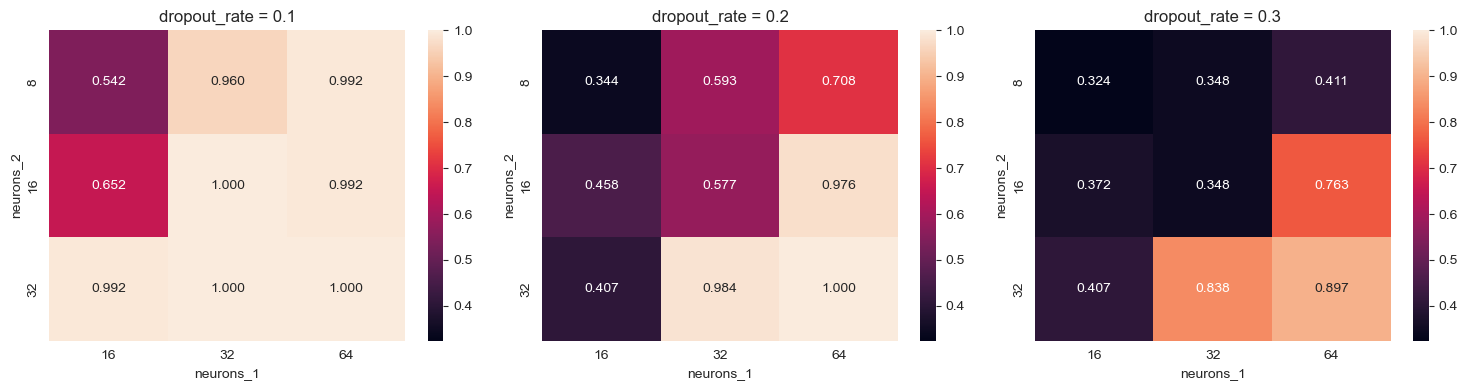

In [41]:
import seaborn as sns

mean_test_scores = np.array(grid.mean_test_scores_)

# Reshape the mean_test_scores
mean_test_scores = mean_test_scores.reshape(3, 3, 3)

# Create a figure
# Create a figure
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Create labels for the axes
dropout_rate = ['0.1', '0.2', '0.3']
neurons_1 = ['16', '32', '64']
neurons_2 = ['8', '16', '32']

# Define color scale min and max
vmin = mean_test_scores.min()
vmax = mean_test_scores.max()

# Loop through the slices
for i in range(3):
    # Create a heatmap for each slice
    sns.heatmap(mean_test_scores[i], xticklabels=neurons_1, yticklabels=neurons_2, annot=True, fmt=".3f", ax=ax[i], vmin=vmin, vmax=vmax)
    ax[i].set_xlabel('neurons_1')
    ax[i].set_ylabel('neurons_2')
    ax[i].set_title('dropout_rate = ' + dropout_rate[i])

plt.tight_layout()
plt.show()

# Prediction

In [55]:
# Emulate user input with 4 symptoms
user_symptoms_list = pd.DataFrame(symptoms).sample(4).values.tolist()

user_symptoms_list = [["itching"], ["skin_rash"]]
# Create a DataFrame with 'symptom' column
user_symptoms_df = pd.DataFrame(user_symptoms_list, columns=['symptom'])

# Initialize an empty DataFrame with all symptom columns
empty_symptoms_encoded = pd.DataFrame(columns=symptoms, dtype=np.uint8)
empty_symptoms_encoded.loc[0] = [0] * len(symptoms)
user_symptoms_encoded = empty_symptoms_encoded.copy()
# Set the corresponding columns of the random symptoms to 1
for symptom in user_symptoms_list:
    user_symptoms_encoded[symptom[0]] = 1

# Reorder columns to match the features in the train set
user_symptoms_encoded = user_symptoms_encoded[X_train.columns]
empty_symptoms_encoded = empty_symptoms_encoded[X_train.columns]

def predict_diseases(symptoms_encoded, model):
    user_symptoms_prob = pd.DataFrame(model.predict_proba(user_symptoms_encoded), columns=model.classes_)
    user_symptoms_prob = user_symptoms_prob.transpose()
    user_symptoms_prob.columns = ['probability']
    user_symptoms_prob = user_symptoms_prob.sort_values(by=['probability'], ascending=False)
    return user_symptoms_prob

## Random forest with prediction details
This section predicts the probabilities of diseases based on the user's input symptoms using the trained random forest classifier. It prints the user's input symptoms and the top predicted diseases with their corresponding probabilities.

In [56]:
print(user_symptoms_list)
probs_rf = predict_diseases(user_symptoms_encoded, clf)
probs_rf.head(5)

[['itching'], ['skin_rash']]


,probability
Fungal infection,0.51
Drug Reaction,0.14
Acne,0.08
Impetigo,0.04
AIDS,0.03


## Neural network with prediction details
This section predicts the probabilities of diseases based on the user's input symptoms using the trained neural network classifier. It prints the user's input symptoms and the top predicted diseases with their corresponding probabilities.

In [57]:
print(user_symptoms_list)
top_diseases = predict_diseases(user_symptoms_list, nn_best_model)
top_diseases.round(2).head(5)

[['itching'], ['skin_rash']]
1/1 [==============================] - 0s 46ms/step


,probability
Fungal infection,0.31
Dengue,0.24
Drug Reaction,0.17
Chicken pox,0.05
Hypothyroidism,0.04


## Probabilities Analysis
This section calculates all possible combinations of symptoms using the 'itertools.combinations' function. It prints the number of possible combinations.
This section generates heatmaps to visualize the probability of getting a disease based on the presence of a symptom. It calculates the probabilities for each disease-symptom combination using the trained models (random forest and neural network) and creates heatmaps using the 'sns.heatmap' function.

In [45]:
import itertools

# List every possible combination of symptoms
symptom_combinations = []
for i in range(1, 4):
    print(f"Calculating combinations of {i} symptoms...")
    symptom_combinations += list(itertools.combinations(symptoms, i))

print(f"There are {len(symptom_combinations)} possible combinations of symptoms.")

Calculating combinations of 1 symptoms...
Calculating combinations of 2 symptoms...
Calculating combinations of 3 symptoms...
There are 374791 possible combinations of symptoms.


In [46]:
# Heatmap of the chance of getting a disease based on the presence of a symptom

# Create an empty DataFrame to store the probabilities
prob_df_clf = pd.DataFrame(columns=symptoms, index=diseases)
prob_df_nn = pd.DataFrame(columns=symptoms, index=diseases)

# Iterate over all diseases
for disease in diseases:
    print(f"Calculating probabilities for {diseases.index(disease) + 1}/{len(diseases)} diseases...")
    # Create an empty list to store the probabilities
    prob_list_clf = []
    prob_list_nn = []

    # Iterate over all symptoms
    for symptom in symptoms:
        # Create a copy of the user input DataFrame
        user_input = empty_symptoms_encoded.copy()

        # Set the symptom to 1
        user_input[symptom] = 1

        # Make a prediction using the trained model
        prediction_clf = clf.predict_proba(user_input)
        prediction_nn = nn_best_model.predict_proba(user_input, verbose=0)

        # Get the probability of the disease
        disease_prob_clf = prediction_clf[0][clf.classes_ == disease][0]
        disease_prob_nn = prediction_nn[0][nn_best_model.classes_ == disease][0]

        # Append to the list
        prob_list_clf.append(disease_prob_clf)
        prob_list_nn.append(disease_prob_nn)

    # Add the list to the DataFrame
    prob_df_clf.loc[disease] = prob_list_clf
    prob_df_nn.loc[disease] = prob_list_nn

# Convert the DataFrame to a numpy array
prob_array_clf = prob_df_clf.to_numpy().astype(np.float32)
prob_array_nn = prob_df_nn.to_numpy().astype(np.float32)

Calculating probabilities for 1/41 diseases...
Calculating probabilities for 2/41 diseases...
Calculating probabilities for 3/41 diseases...
Calculating probabilities for 4/41 diseases...
Calculating probabilities for 5/41 diseases...
Calculating probabilities for 6/41 diseases...
Calculating probabilities for 7/41 diseases...
Calculating probabilities for 8/41 diseases...
Calculating probabilities for 9/41 diseases...
Calculating probabilities for 10/41 diseases...
Calculating probabilities for 11/41 diseases...
Calculating probabilities for 12/41 diseases...
Calculating probabilities for 13/41 diseases...
Calculating probabilities for 14/41 diseases...
Calculating probabilities for 15/41 diseases...
Calculating probabilities for 16/41 diseases...
Calculating probabilities for 17/41 diseases...
Calculating probabilities for 18/41 diseases...
Calculating probabilities for 19/41 diseases...
Calculating probabilities for 20/41 diseases...
Calculating probabilities for 21/41 diseases...
C

KeyboardInterrupt: 

In [ ]:
# Plot the heatmap for the random forest model
plt.figure(figsize=(40, 15))
sns.heatmap(prob_array_clf, cmap='viridis', xticklabels=symptoms, yticklabels=diseases, vmin=0.01, vmax=1)
plt.show()

In [ ]:
# Plot the heatmap for the neural network model
plt.figure(figsize=(40, 15))
sns.heatmap(prob_array_nn, cmap='viridis', xticklabels=symptoms, yticklabels=diseases, vmin=0.01, vmax=1)
plt.show()